In [ ]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn
!pip install scipy
!pip install gdown

In [ ]:
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns

import scipy.stats as stats
from sklearn.impute import SimpleImputer as Imputer

import gdown

In [ ]:
file_id = "13elVDJJ6JUH2gsj36CxPjkLryE2rnl-r"
url = f"https://drive.google.com/uc?id={file_id}"

gdown.download(url, "flight_data.csv", quiet=False)

flight_data = pd.read_csv("flight_data.csv")

Downloading...
From (original): https://drive.google.com/uc?id=13elVDJJ6JUH2gsj36CxPjkLryE2rnl-r
From (redirected): https://drive.google.com/uc?id=13elVDJJ6JUH2gsj36CxPjkLryE2rnl-r&confirm=t&uuid=27658247-e0ef-4c28-ade6-b4998923ed25
To: /content/flight_data.csv
100%|██████████| 1.32G/1.32G [00:24<00:00, 53.0MB/s]


In [ ]:
flight_data.shape
flight_data.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,MKT_CARRIER_AIRLINE_ID,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_NAME,DEST_AIRPORT_ID,...,CANCELLATION_CODE,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,index
0,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",10423,...,NaN,95.0,103.0,619.0,7.0,0.0,8.0,0.0,0.0,0
1,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",10423,...,NaN,100.0,106.0,619.0,0.0,0.0,0.0,0.0,0.0,1
2,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",10800,...,NaN,130.0,110.0,672.0,0.0,0.0,0.0,0.0,0.0,2
3,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",10821,...,NaN,215.0,216.0,1670.0,14.0,0.0,1.0,0.0,0.0,3
4,2024,1,1,1,1,19393,10140,1014005,"Albuquerque, NM",11259,...,NaN,105.0,98.0,580.0,0.0,0.0,0.0,0.0,0.0,4


In [ ]:
print(flight_data.columns.tolist())

['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'MKT_CARRIER_AIRLINE_ID', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID', 'ORIGIN_CITY_NAME', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID', 'DEST_CITY_NAME', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY_NEW', 'DEP_DEL15', 'DEP_DELAY_GROUP', 'ARR_TIME', 'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'CANCELLED', 'CANCELLATION_CODE', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'DISTANCE', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'index']


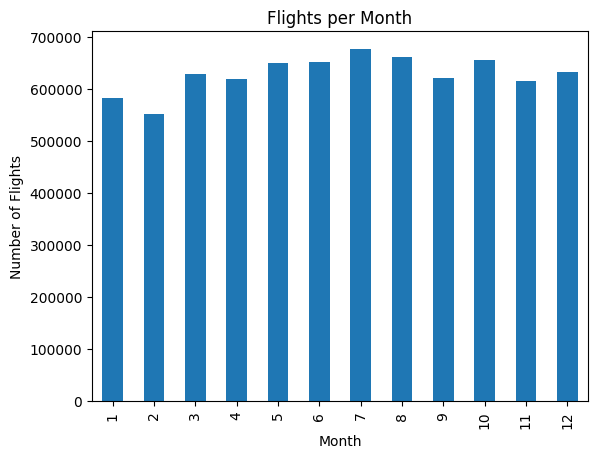

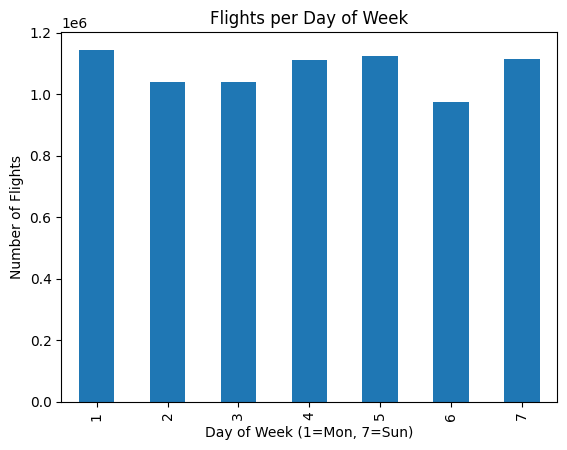

In [ ]:
flight_data['MONTH'].value_counts().sort_index().plot(kind='bar')
plt.title('Flights per Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.show()

flight_data['DAY_OF_WEEK'].value_counts().sort_index().plot(kind='bar')
plt.title('Flights per Day of Week')
plt.xlabel('Day of Week (1=Mon, 7=Sun)')
plt.ylabel('Number of Flights')
plt.show()

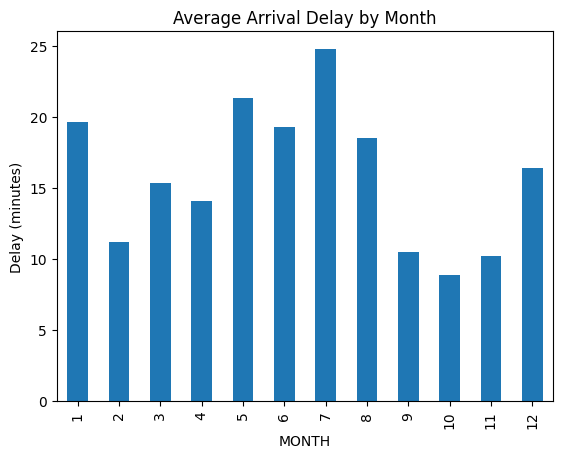

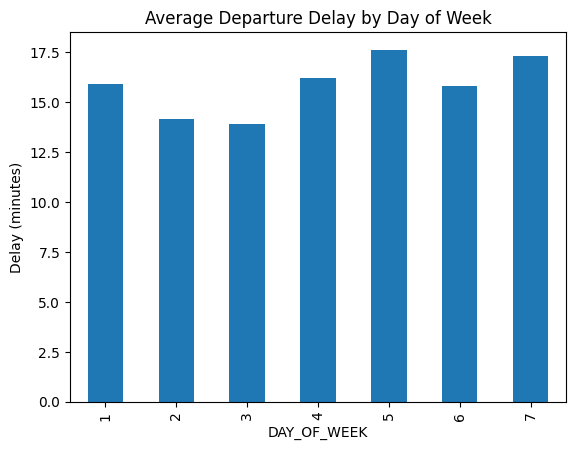

In [ ]:
flight_data.groupby('MONTH')['ARR_DELAY_NEW'].mean().plot(kind='bar')
plt.title('Average Arrival Delay by Month')
plt.ylabel('Delay (minutes)')
plt.show()

flight_data.groupby('DAY_OF_WEEK')['DEP_DELAY_NEW'].mean().plot(kind='bar')
plt.title('Average Departure Delay by Day of Week')
plt.ylabel('Delay (minutes)')
plt.show()

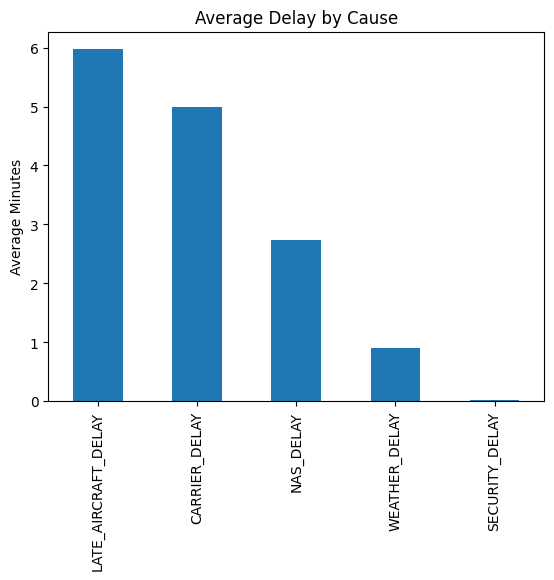

In [ ]:
delay_cols = ['CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
flight_data[delay_cols].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Average Delay by Cause')
plt.ylabel('Average Minutes')
plt.show()

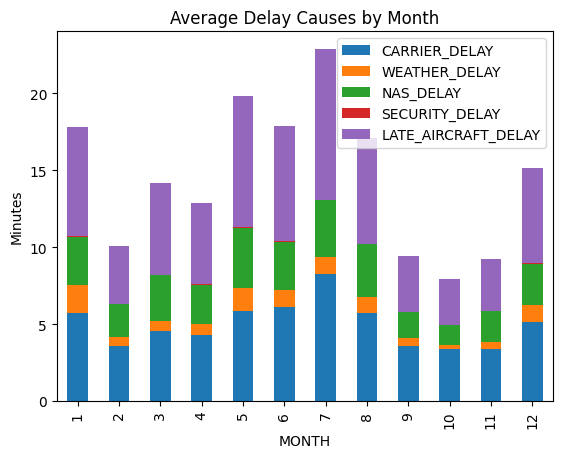

In [ ]:
flight_data.groupby('MONTH')[delay_cols].mean().plot(kind='bar', stacked=True)
plt.title('Average Delay Causes by Month')
plt.ylabel('Minutes')
plt.show()

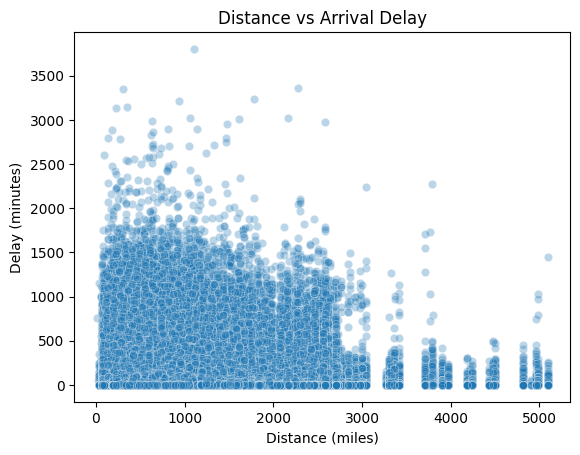

In [ ]:
sns.scatterplot(x='DISTANCE', y='ARR_DELAY_NEW', data=flight_data, alpha=0.3)
plt.title('Distance vs Arrival Delay')
plt.xlabel('Distance (miles)')
plt.ylabel('Delay (minutes)')
plt.show()

In [ ]:
avg_delay_routes = (flight_data
    .groupby(['ORIGIN_CITY_NAME', 'DEST_CITY_NAME'])['ARR_DELAY_NEW']
    .mean()
    .sort_values(ascending=False)
    .head(10))

print(avg_delay_routes)

ORIGIN_CITY_NAME       DEST_CITY_NAME    
New York, NY           New York, NY          755.000000
Philadelphia, PA       Trenton, NJ           588.500000
Louisville, KY         Salt Lake City, UT    365.000000
Asheville, NC          Concord, NC           310.000000
Fresno, CA             Monterey, CA          310.000000
Martha's Vineyard, MA  Charlotte, NC         191.636364
Los Angeles, CA        Appleton, WI          178.000000
St. Petersburg, FL     Valparaiso, FL        178.000000
Appleton, WI           Los Angeles, CA       172.500000
Oklahoma City, OK      Columbia, SC          171.000000
Name: ARR_DELAY_NEW, dtype: float64


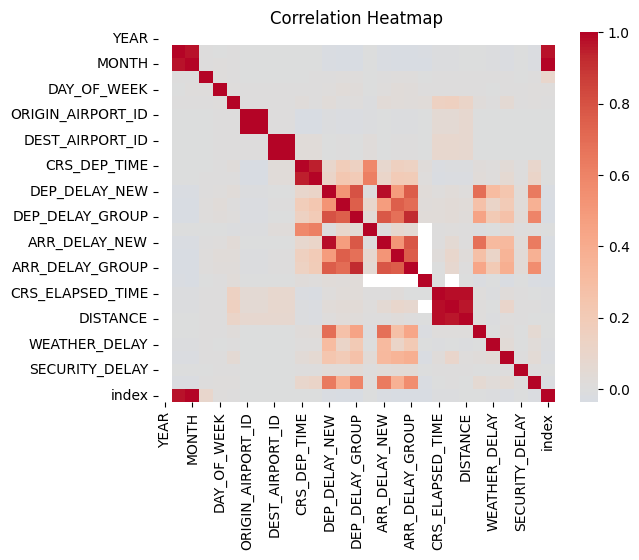

In [ ]:
corr = flight_data.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

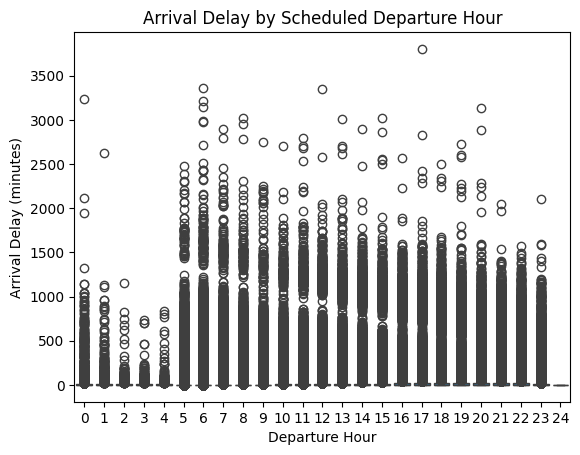

In [ ]:
flight_data['DEP_HOUR'] = flight_data['CRS_DEP_TIME'] // 100
sns.boxplot(x='DEP_HOUR', y='ARR_DELAY_NEW', data=flight_data)
plt.title('Arrival Delay by Scheduled Departure Hour')
plt.xlabel('Departure Hour')
plt.ylabel('Arrival Delay (minutes)')
plt.show()